# FTML Project Exercice 1

This is the first exercise of the FTML project.

## Question 1

In this exercise, we will talk about politics. The events, characters, and situations described in this document are entirely fictional and are not intended to represent or reflect any real individuals, institutions, or occurrences. Any resemblance to actual events or persons, living or dead, is purely coincidental.

Anyways, our subject for this supervised learning will be the signature of decrees by Danold Trump, resulting in a market dropdown. 

- Our input space X is N² as a vector (n, t), with n the number of decrees signed this day and t, how many tweets Danold Trump posted about these decrees (both n and t natural and positive).

  
  
- Our output space is a Natural y, representing the market Dropdown for the same day, in percents and as a discrete value. We consider this number natural and strictly positive.

  

  
- The relation between X (n, t) and Y are as follow:<p style="text-align:center;">Y = n * S + t</p>We introduce S a random variable, following a uniform distribution in {1, 2, 3}. Y is how many bilions the market has lost.
  

- We will use Square Loss as the loss function.




---
## Let us define the Bayes predictor for this situation:

- First, we identify the random component as the variable S, which's expectation can be calculated as follow:

$$E[S] = \frac{1 + 2 + 3}{3}  = 2$$

- Therefore, we can calculate the Bayes estimator for our settings:

$$f^*(n, t) = 2n + t$$

---
## Let us calculate the Bayes Risk for this setting

- We must calculate the real risk of the bayes estimator, which is defined as the average loss for the estimator, defined as follow:

$$
R(f^*(n, t)) = \mathbb{E}\left[(Y - (n \cdot S + t))^2\right]
$$

- We now compute the variance of Y - f*, which is the variance of f*(n, t), calculated as follow

$$
\text{Var}(f^*) = \text{Var}(n \cdot S + t) = n^2 \cdot \text{Var}(S)
$$

- Then we compute Var(S) as follow:

$$
\text{Var}(S) = \mathbb{E}[S^2] - \left(\mathbb{E}[S]\right)^2 = \frac{1^2 + 2^2 + 3^2}{3} - 4 = \frac{14}{3} - 4 = \frac{2}{3}
$$

$$\newline\newline$$



Therefore, our Bayes is risk is 2n²/3
    

## Question 2

For this question, we will define a new estimator and compute its associated risks on a test set.

$$g^* = n$$

E_f = 18.967414
E_g = 257.054497


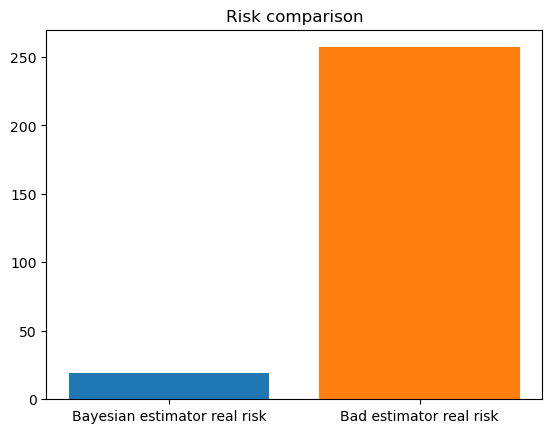

In [98]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 1_000_000

# bayes estimator
f = lambda n, t: 2 * n + t

# bad estimator
g = lambda n, t: n

n = np.random.randint(low = 0, high = 10, size = SAMPLE_SIZE)
t = np.random.randint(low = 0, high = 20, size = SAMPLE_SIZE)
s = np.random.randint(low = 1, high = 4,  size = SAMPLE_SIZE)

Y = s * n + t

X_f = f(n, t)
X_g = g(n, t)


# Mean absolute errors
E_g = np.mean((X_g - Y) ** 2)
E_f = np.mean((X_f - Y) ** 2)

print("E_f =", E_f)
print("E_g =", E_g)

assert E_f < E_g, "the generalization error is smaller for f∗ than for g"

plt.title("Risk comparison")
plt.bar(x="Bayesian estimator real risk", height=E_f)
plt.bar(x="Bad estimator real risk",      height=E_g)

pass